# Exploratory Data Analysis

### Load Data

In [2]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import tidied data set
CITES = pd.read_csv("CITES.csv", index_col = 0)

# Check that it has imported correctly
CITES.head(3)

,Year,Taxon,Importer,Exporter,Origin,Term,Unit,Quantity,Region,Number,Purpose
0,1977,Manis pentadactyla,AU,CN,NaN,live,NaN,2.0,Asian,2.0,whole
1,1978,Manis crassicaudata,US,JP,XX,skins,NaN,298.0,Asian,298.0,skins
2,1978,Manis javanica,US,JP,XX,skins,NaN,1016.0,Asian,1016.0,skins


This data frame should contain 11 columns, from Year to Purpose.  Please check that it has loaded correctly before continuing.

### Trends by Region

According to a report for the 66th CITES Standing Committee meeting (IUCN SSC Pangolin Specialist Group, 2016), as restrictions have strengthened for the trade of Asian pangolin species, there has been an increase in the trade of African pangolin species to meet the demand. Let us plot the total recorded number of pangolins traded according to region to examine this claim. 

In [4]:
# Group data by region
reg_Africa = CITES[CITES['Region'] == 'African'][['Year', 'Number']]
reg_Asia = CITES[CITES['Region'] == 'Asian'][['Year', 'Number']]

# Group regional data by year
reg_Africa = reg_Africa.groupby('Year')['Number'].sum()
reg_Asia = reg_Asia.groupby('Year')['Number'].sum()

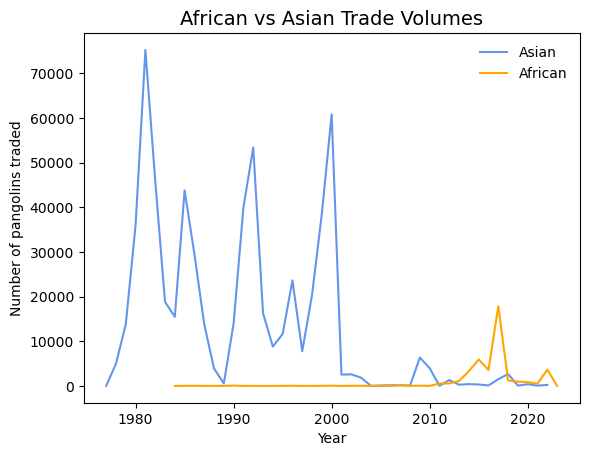

In [5]:
# Plot comparison
plt.plot(reg_Asia, color = 'cornflowerblue')
plt.plot(reg_Africa, color = 'orange')
plt.title('African vs Asian Trade Volumes', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Number of pangolins traded')
plt.legend(['Asian', 'African'], frameon = False)

There is a drastic decrease in the reported trade of Asian pangolin species around the year 2000.  It was during this year that a zero export quota for wild-caught Asian pangolins came into effect (IUCN SSC Pangolin Specialist Group, 2016).  There is a clear increase in trade in African pangolin species from around 2010, and for most of the subsequent years there were more African pangolins traded than Asian.  This confirms the assertions made in the document for Convention on International Trade in Endangered Species of  ildD auna and  lora (IUCN SSC Pangolin Specialist Group, 2016).  AHowever, the trade in African pangolins does not reach the same volumes as the pre-2000 trade in Asian pangolins. 

### Trends by Purpose

Let us examine what type of pangolin products are the most popular.

In [6]:
# Group data by purpose
pur_whole = CITES[CITES['Purpose'] == 'whole'][['Year', 'Number']]
pur_skins = CITES[CITES['Purpose'] == 'skins'][['Year', 'Number']]
pur_trophy = CITES[CITES['Purpose'] == 'trophy'][['Year', 'Number']]
pur_derivatives = CITES[CITES['Purpose'] == 'derivatives'][['Year', 'Number']]
pur_consumption = CITES[CITES['Purpose'] == 'consumption'][['Year', 'Number']]
pur_medicine = CITES[CITES['Purpose'] == 'medicine'][['Year', 'Number']]

# Group regional data by year
pur_whole = pur_whole.groupby('Year')['Number'].sum()
pur_skins = pur_skins.groupby('Year')['Number'].sum()
pur_trophy = pur_trophy.groupby('Year')['Number'].sum()
pur_derivatives = pur_derivatives.groupby('Year')['Number'].sum()
pur_consumption = pur_consumption.groupby('Year')['Number'].sum()
pur_medicine = pur_medicine.groupby('Year')['Number'].sum()

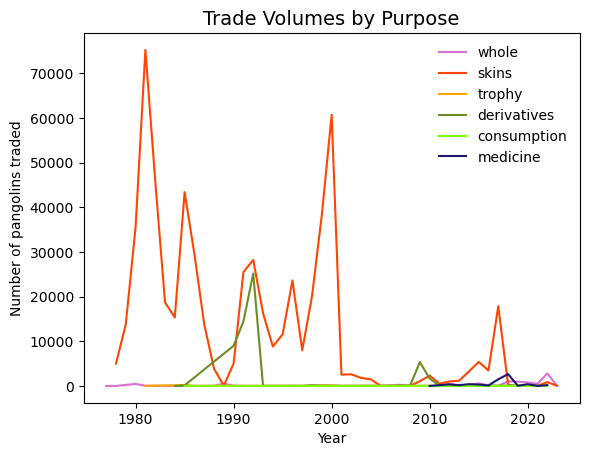

In [7]:
# Plot comparison
plt.plot(pur_whole, color = 'orchid')
plt.plot(pur_skins, color = 'orangered')
plt.plot(pur_trophy, color = 'orange')
plt.plot(pur_derivatives, color = 'olivedrab')
plt.plot(pur_consumption, color = 'lawngreen')
plt.plot(pur_medicine, color = 'midnightblue')
plt.title('Trade Volumes by Purpose', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Number of pangolins traded')
plt.legend(['whole', 'skins', 'trophy', 'derivatives', 'consumption', 'medicine'], frameon = False)

While this plot is not very readable for the lower-volume purposes, it is clear that the most widely traded item by far is pangolin skins.  Recall that this category includes skins, scales, and all leather products.  Let us examine each category separately as well.

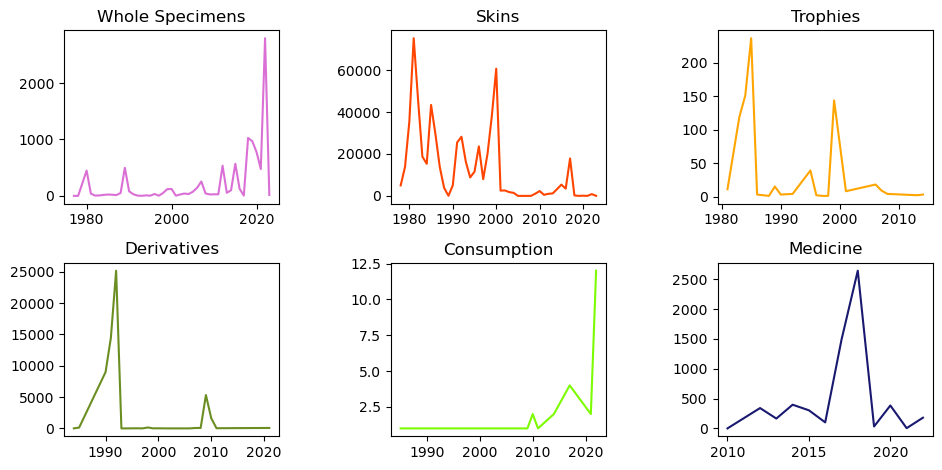

In [8]:
# Plots for each purpose
fig, axs = plt.subplots(2,3)
axs[0,0].plot(pur_whole, color = 'orchid')
axs[0,0].set_title('Whole Specimens')
axs[0,1].plot(pur_skins, color = 'orangered')
axs[0,1].set_title('Skins')
axs[0,2].plot(pur_trophy, color = 'orange')
axs[0,2].set_title('Trophies')
axs[1,0].plot(pur_derivatives, color = 'olivedrab')
axs[1,0].set_title('Derivatives')
axs[1,1].plot(pur_consumption, color = 'lawngreen')
axs[1,1].set_title('Consumption')
axs[1,2].plot(pur_medicine, color = 'midnightblue')
axs[1,2].set_title('Medicine')
fig.tight_layout()
fig.set_figwidth(10)

Trade of whole specimens and meat / consumption related products has increased in recent years, whereas trade in skins, trohpies, and derivatives has decreased.  There does not seem to be a discernible pattern for medicinal products.

### Trends Overall

In [9]:
# Group total data by year
total = CITES[['Year', 'Number']]
total = CITES.groupby('Year')['Number'].sum()

Text(0, 0.5, 'Number of pangolins traded')

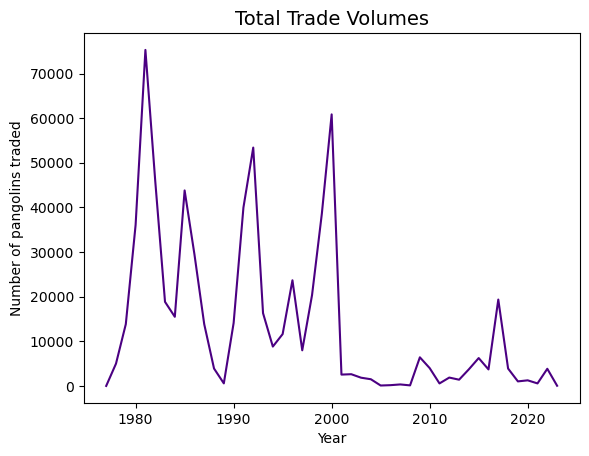

In [10]:
# Plot 
plt.plot(total, color = 'indigo')
plt.title('Total Trade Volumes', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Number of pangolins traded')

Once again, we see that the recorded trades have decreased since the introduction of trade restrictions in 2000.  There is still, however, likely to be large volumes of trade occurring unrecorded (IUCN SSC Pangolin Specialist Group, 2016).

In [11]:
# Export all the smaller data frames we created
total.to_csv('grp_total.csv')
pur_whole.to_csv('grp_pur_whole.csv')
pur_skins.to_csv('grp_pur_skins.csv')
pur_trophy.to_csv('grp_pur_trophy.csv')
pur_derivatives.to_csv('grp_pur_derivatives.csv')
pur_consumption.to_csv('grp_pur_consumption.csv')
pur_medicine.to_csv('grp_pur_medicine.csv')

### References

1. IUCN SSC Pangolin Specialist Group. (2016, January 11). THE CONSERVATION STATUS, ILLEGAL TRADE AND USE OF PANGOLINS (MANIS SPP.) - Information Document for the 66th Meeting of the CITES Standing Committee. Retrieved from CITES.org: https://cites.org/sites/default/files/eng/com/sc/66/Inf/E-SC66-Inf-23.pdf